In [1]:
!pip install pandas flask


In [2]:
!pip install pandas matplotlib flask


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   Fiscal Year Company Name Total Revenue    Net Income Total Assets  \
0         2022        Apple    $ 394,328    $99,803.00           NaN   
1         2023        Apple    $ 383,285    $96,995.00       352,583   
2         2024        Apple    $ 391,035    $93,736.00       364,980   
3         2022    Microsoft    $ 198,270      $ 72,738           NaN   
4         2023    Microsoft    $ 211,915      $ 72,361       411,976   

  Total Liabilities Cash Flow (Operating Activities)  
0               NaN                          122,151  
1           290,437                          110,543  
2           308,030                          118,254  
3               NaN                           89,035  
4           205,753                           87,582  
  Fiscal Year Company Name  Total Revenue  Net Income  Total Assets  \
0        2022        Apple       394328.0     99803.0           0.0   
1        2023        Apple       383285.0     96995.0      352583.0   
2        2024        App

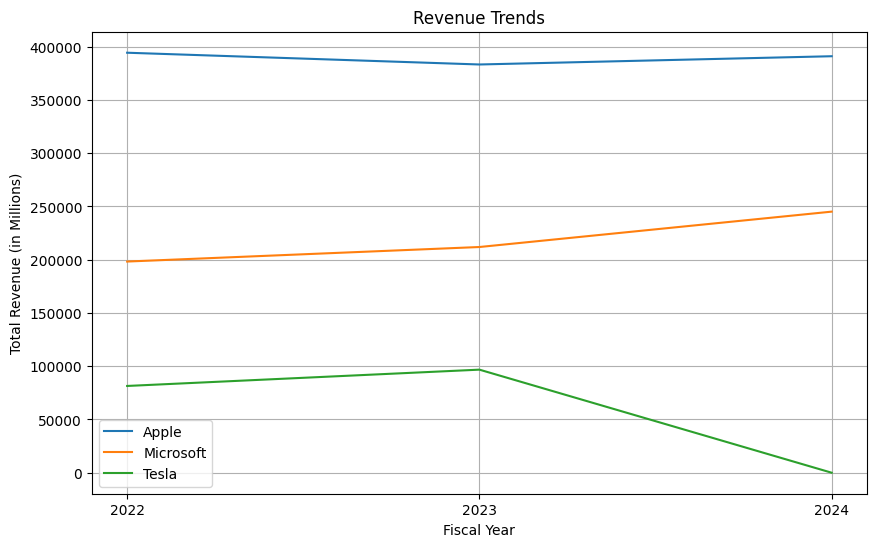

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
# Cambia el path por el archivo correspondiente
file_path = 'Financial_Report.csv'
data = pd.read_csv(file_path)

# Mostrar los primeros datos
print(data.head())

# 1. Eliminar símbolos de $ y comas para convertir las columnas financieras a números
columns_to_clean = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow (Operating Activities)']

for col in columns_to_clean:
    data[col] = data[col].replace('[\$,]', '', regex=True)  # Elimina '$' y comas
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convierte a numérico

# 2. Asegurarse de que el año sea tipo str o int
data['Fiscal Year'] = data['Fiscal Year'].astype(str)

# 3. Manejar valores nulos
# Puedes rellenarlos con 0 o el promedio de la columna, dependiendo de tu preferencia.
data = data.fillna(0)

# Mostrar el DataFrame limpio
print(data)

# 4. Crear un gráfico para 'Total Revenue'
plt.figure(figsize=(10, 6))

for company in data['Company Name'].unique():
    company_data = data[data['Company Name'] == company]
    if not company_data.empty:  # Verifica que haya datos
        plt.plot(company_data['Fiscal Year'], company_data['Total Revenue'], label=company)

plt.title('Revenue Trends')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Revenue (in Millions)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Load the data from the Excel spreadsheet
file_path = 'Financial Report.xlsx'
df = pd.read_excel(file_path)

# Calculate year-over-year growth rates for Total Revenue and Net Income
df['Revenue Growth (%)'] = df.groupby('Company Name')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company Name')['Net Income'].pct_change() * 100

# Fill NA values that result from pct_change calculations with 0 or an appropriate value
df.fillna(0, inplace=True)

# Display the dataframe to verify the calculations
print(df)

# Optionally, you could summarize these findings for each company
summary = df.groupby('Company Name').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).reset_index()

print("\nYear-over-Year Average Growth Rates (%):")
print(summary)

   Fiscal Year Company Name  Total Revenue  Net Income  Total Assets  \
0         2022        Apple       394328.0     99803.0           0.0   
1         2023        Apple       383285.0     96995.0      352583.0   
2         2024        Apple       391035.0     93736.0      364980.0   
3         2022    Microsoft       198270.0     72738.0           0.0   
4         2023    Microsoft       211915.0     72361.0      411976.0   
5         2024    Microsoft       245122.0     88136.0      512163.0   
6         2022        Tesla        81462.0     12587.0       82338.0   
7         2023        Tesla        96773.0     14974.0      106618.0   
8         2024        Tesla            0.0         0.0           0.0   

   Total Liabilities  Cash Flow (Operating Activities)  Revenue Growth (%)  \
0                0.0                          122151.0            0.000000   
1           290437.0                          110543.0           -2.800461   
2           308030.0                         

<ipython-input-10-dae4f340476f>:6: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Revenue Growth (%)'] = df.groupby('Company Name')['Total Revenue'].pct_change() * 100
<ipython-input-10-dae4f340476f>:7: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Net Income Growth (%)'] = df.groupby('Company Name')['Net Income'].pct_change() * 100


In [23]:
import pandas as pd

# Load financial data (replace the path with the correct one in Colab)
file_path = 'Financial_Report.csv'
data = pd.read_csv(file_path)

# Clean the data (remove $ and commas, and convert to numeric)
columns_to_clean = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow (Operating Activities)']
for col in columns_to_clean:
    data[col] = data[col].replace('[\$,]', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Ensure Fiscal Year is string
data['Fiscal Year'] = data['Fiscal Year'].astype(str)

# Basic Chatbot logic using if-else statements and user input
def simple_chatbot():
    print("Welcome to the Financial Chatbot!")
    print("You can ask about Total Revenue, Net Income changes, Revenue Growth, or get full financial data by Fiscal Year and Company Name.")
    print("Type 'exit' to quit.")

    while True:
        # Ask user for input
        user_query = input("\nWhat is your question? ").strip().lower()

        if user_query == 'exit':
            print("Thank you for using the Financial Chatbot!")
            break

        # Check for "highest" queries first (e.g., highest total revenue, highest net income)
        if "highest" in user_query:
            if "total revenue" in user_query:
                year = input("Enter the fiscal year (e.g., 2022): ")
                highest_revenue = data[data['Fiscal Year'] == year].nlargest(1, 'Total Revenue')
                company = highest_revenue['Company Name'].values[0]
                revenue = highest_revenue['Total Revenue'].values[0]
                print(f"The company with the highest total revenue in {year} is {company} with {revenue}.")

            elif "net income" in user_query:
                year = input("Enter the fiscal year (e.g., 2022): ")
                highest_net_income = data[data['Fiscal Year'] == year].nlargest(1, 'Net Income')
                company = highest_net_income['Company Name'].values[0]
                net_income = highest_net_income['Net Income'].values[0]
                print(f"The company with the highest net income in {year} is {company} with {net_income}.")

        # Respond to questions about Total Revenue
        elif "total revenue" in user_query:
            company = input("Enter the company name (Tesla, Apple, Microsoft): ").capitalize()
            year = input("Enter the fiscal year (e.g., 2022): ")

            total_revenue = data[(data['Company Name'] == company) & (data['Fiscal Year'] == year)]['Total Revenue'].values
            if total_revenue.size > 0:
                print(f"The total revenue for {company} in {year} is {total_revenue[0]}.")
            else:
                print("Data not found for that company and year.")

        # Respond to questions about Net Income Changes
        elif "net income" in user_query and "changed" in user_query:
            company = input("Enter the company name (Tesla, Apple, Microsoft): ").capitalize()
            year = input("Enter the fiscal year (e.g., 2022): ")

            net_income_growth = data[(data['Company Name'] == company) & (data['Fiscal Year'] == year)]['Net Income Growth (%)'].values
            if net_income_growth.size > 0:
                print(f"The net income for {company} has changed by {net_income_growth[0]}% over the last year.")
            else:
                print("Data not found for that company and year.")

        # Respond to questions about Average Revenue Growth
        elif "average revenue growth" in user_query:
            company = input("Enter the company name (Tesla, Apple, Microsoft): ").capitalize()

            avg_revenue_growth = data[data['Company Name'] == company]['Total Revenue'].mean()
            print(f"The average revenue growth for {company} is {avg_revenue_growth:.2f}%.")

        # Respond to full financial data query (Fiscal Year + Company Name)
        elif "financial data" in user_query:
            company = input("Enter the company name (Tesla, Apple, Microsoft): ").capitalize()
            year = input("Enter the fiscal year (e.g., 2022): ")

            # Get all relevant financial data for the specified company and year
            financial_data = data[(data['Company Name'] == company) & (data['Fiscal Year'] == year)]

            if not financial_data.empty:
                print(f"\nFinancial Data for {company} in {year}:")
                print(f"Total Revenue: {financial_data['Total Revenue'].values[0]}")
                print(f"Net Income: {financial_data['Net Income'].values[0]}")
                print(f"Total Assets: {financial_data['Total Assets'].values[0]}")
                print(f"Total Liabilities: {financial_data['Total Liabilities'].values[0]}")
                print(f"Cash Flow (Operating Activities): {financial_data['Cash Flow (Operating Activities)'].values[0]}")
            else:
                print("Data not found for that company and year.")

        else:
            print("Sorry, I can only provide information on predefined queries.")

# Run the chatbot
simple_chatbot()


Welcome to the Financial Chatbot!
You can ask about Total Revenue, Net Income changes, Revenue Growth, or get full financial data by Fiscal Year and Company Name.
Type 'exit' to quit.

What is your question? what is the highest total revenue
Enter the fiscal year (e.g., 2022): 2022
The company with the highest total revenue in 2022 is Apple with 394328.0.

What is your question? financial data
Enter the company name (Tesla, Apple, Microsoft): microsoft
Enter the fiscal year (e.g., 2022): 2022

Financial Data for Microsoft in 2022:
Total Revenue: 198270.0
Net Income: 72738.0
Total Assets: nan
Total Liabilities: nan
Cash Flow (Operating Activities): 89035.0

What is your question? what is the total revenue for apple
Enter the company name (Tesla, Apple, Microsoft): apple
Enter the fiscal year (e.g., 2022): 2023
The total revenue for Apple in 2023 is 383285.0.

What is your question? exit
Thank you for using the Financial Chatbot!
